# Introduction

## Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

## Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

Source: https://archive.ics.uci.edu/ml/datasets/mushroom
    and code used for part of the presentation from MiguelDomingues



In [1]:
from IPython.display import Image
from IPython.core.display import HTML

Image(
    url="https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-glossary.jpg"
)
%load_ext lab_black

Goal: get the highest possible score "true positive rate"

In [2]:
Image(
    url="https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-shape.jpg"
)

In [3]:
Image(
    url="https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-surface.jpg"
)

In [4]:
Image(
    url="https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-attachment.jpg"
)

In [5]:
Image(
    url="https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-spacing.jpg"
)

In [6]:
Image(
    url="https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-tissue-arrangement.jpg"
)

In [7]:
Image(url="https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg")

In [8]:
Image(
    url="https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-ring-type.jpg"
)

Source: https://datascienceplus.com/mushrooms-classification-part-1/

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
import warnings
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

warnings.filterwarnings("ignore")
from pandas import read_csv

/home/spider/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/spider/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/spider/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/spider/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [10]:
# Unzipping
new_folder = "Data"
zip_file = os.path.join(new_folder, "mushroom-classification.zip")
new_files_location = os.path.join(os.getcwd(), new_folder)

try:
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        zip_ref.extractall(new_files_location)
except:
    print("Error during unzipping")

del zip_file, new_files_location

raw_data_file = os.path.join(new_folder, "mushrooms.csv")

In [11]:
%%time
raw_data = pd.read_csv(raw_data_file)

CPU times: user 19.8 ms, sys: 0 ns, total: 19.8 ms
Wall time: 18.8 ms


# Overall analysis

In [12]:
raw_data.shape

(8124, 23)

In [13]:
raw_data.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


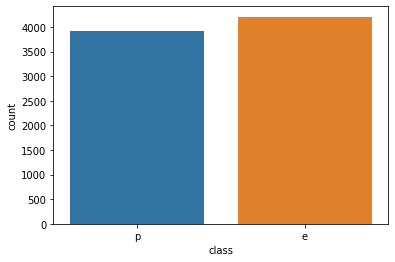

In [14]:
splt = sns.countplot(x="class", data=raw_data)

In [15]:
def sns_plot(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={"figure.figsize": (11.7, 8.27)})
        splt = sns.countplot(x=data[col], hue=hue, data=data)

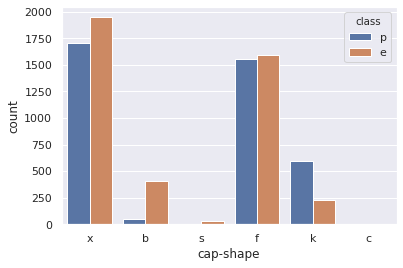

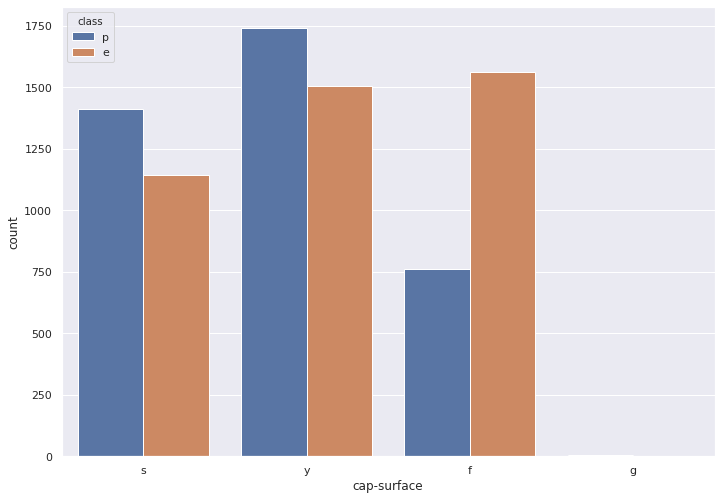

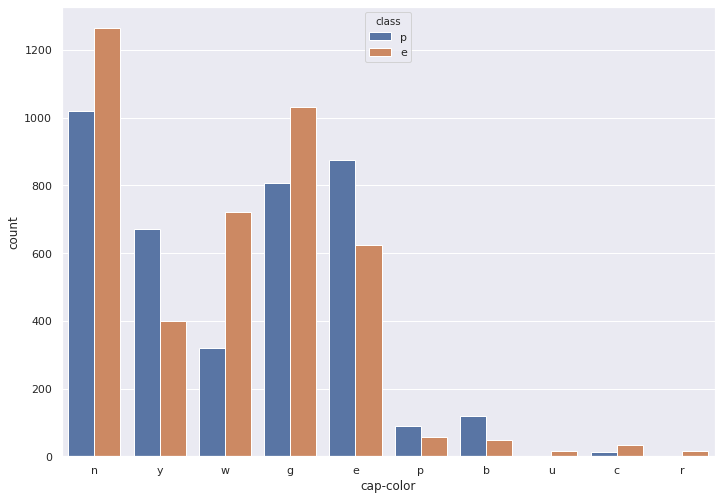

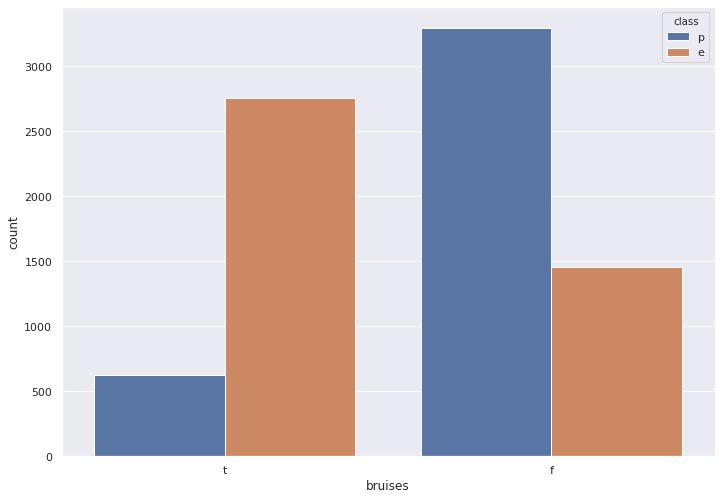

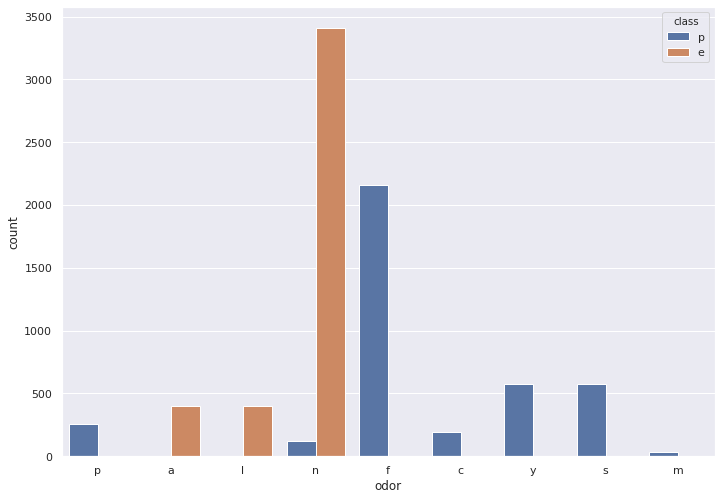

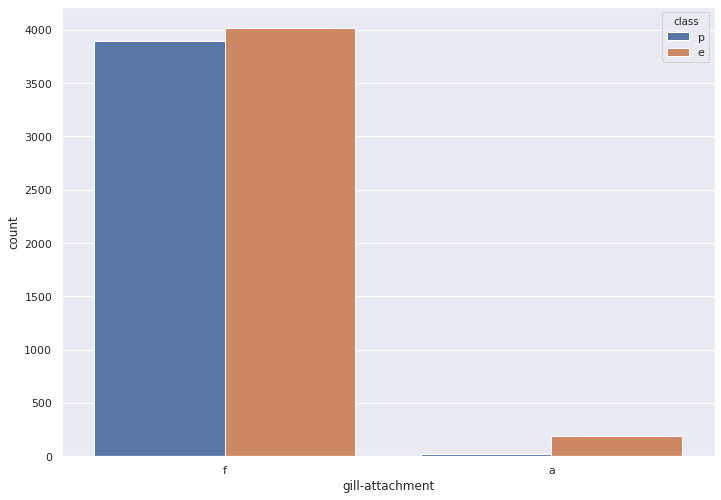

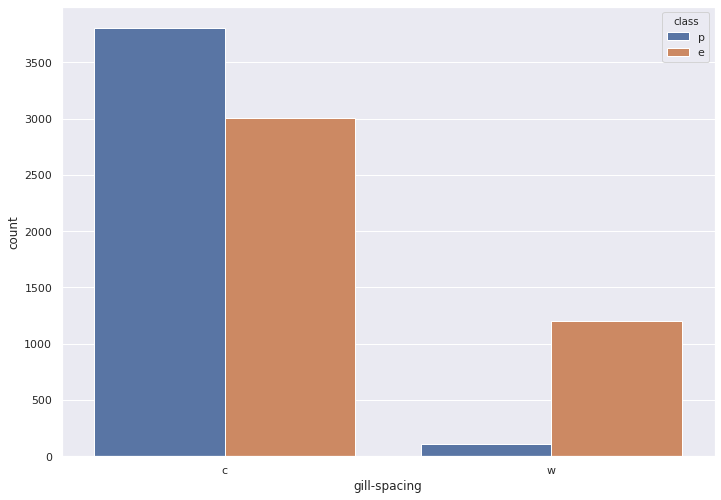

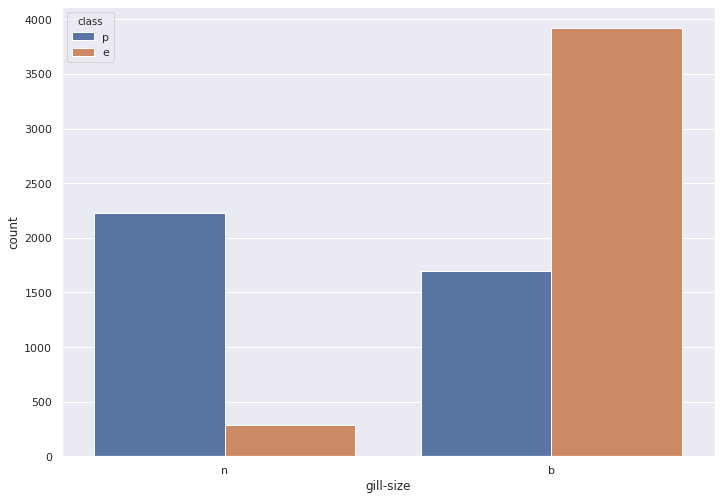

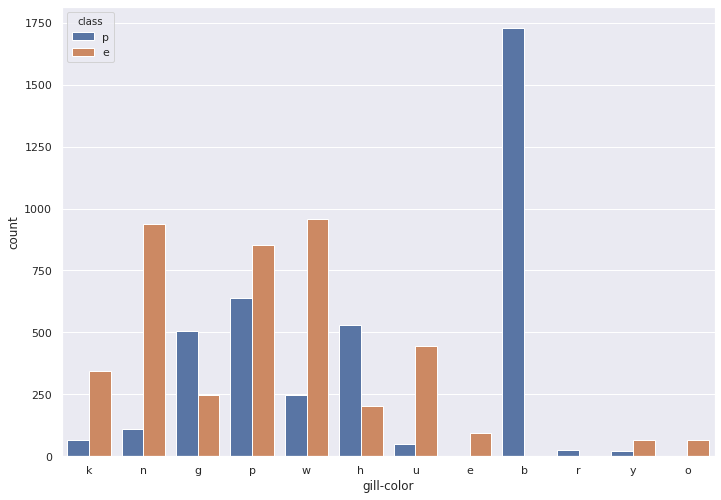

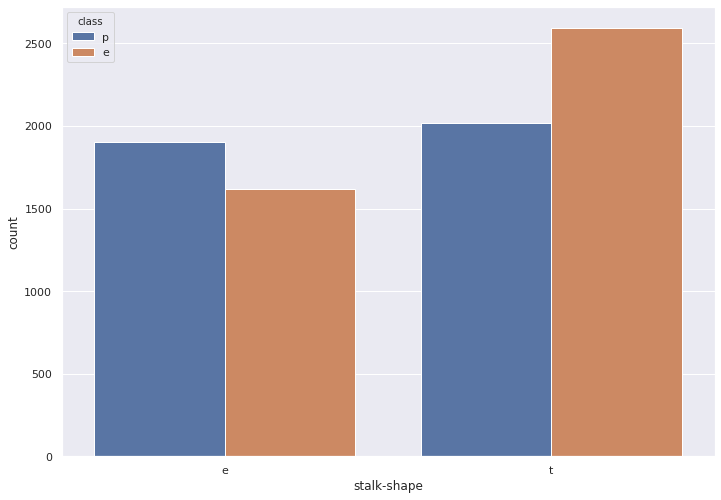

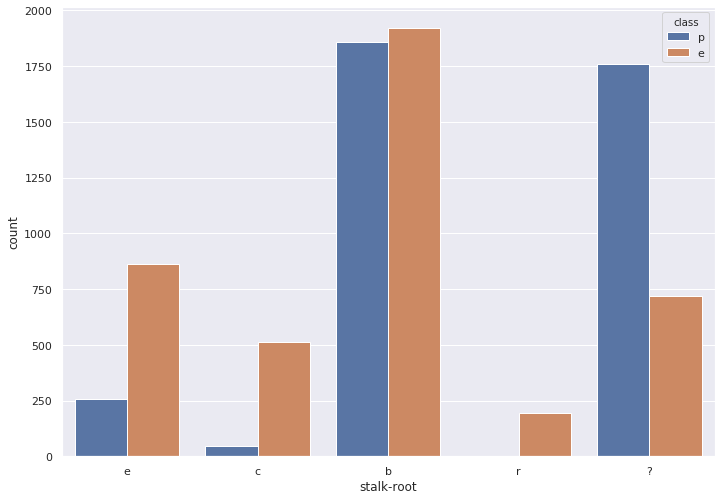

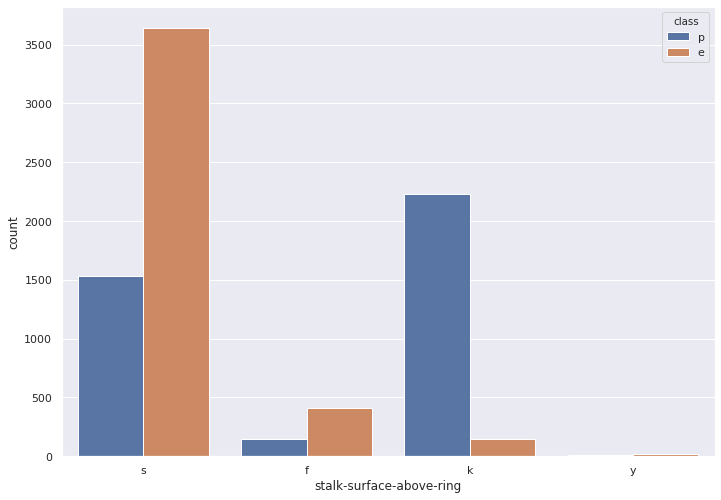

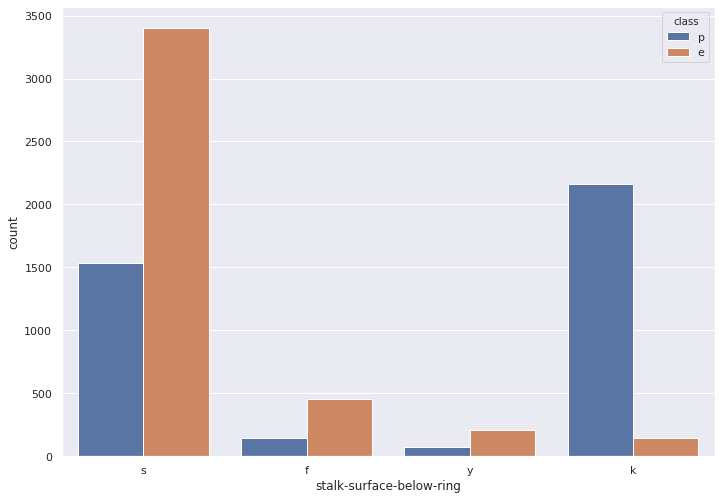

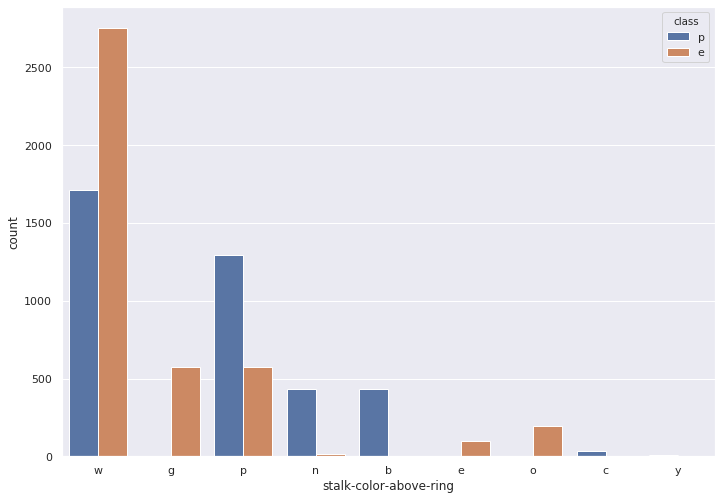

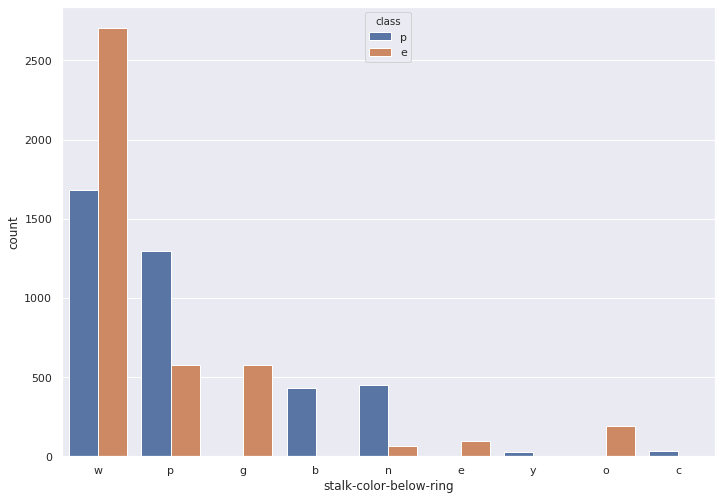

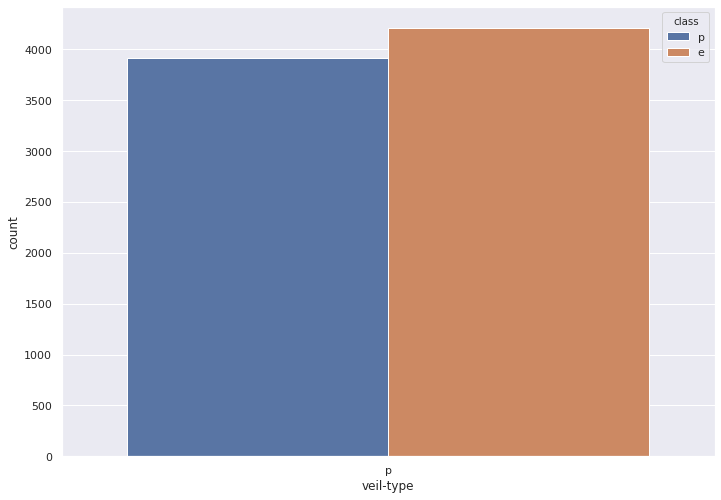

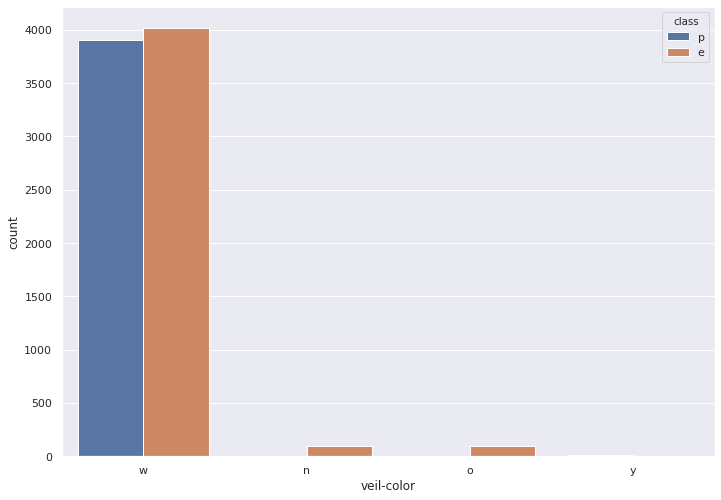

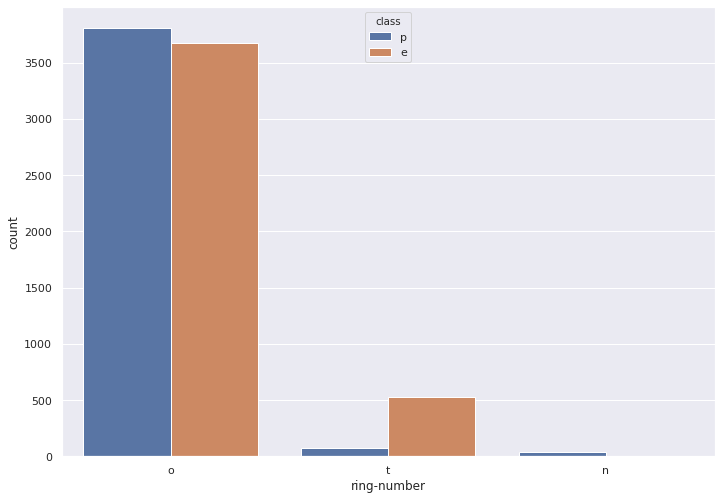

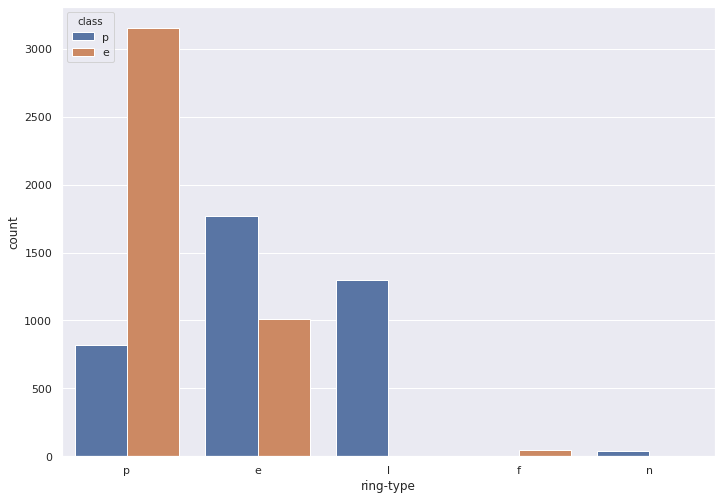

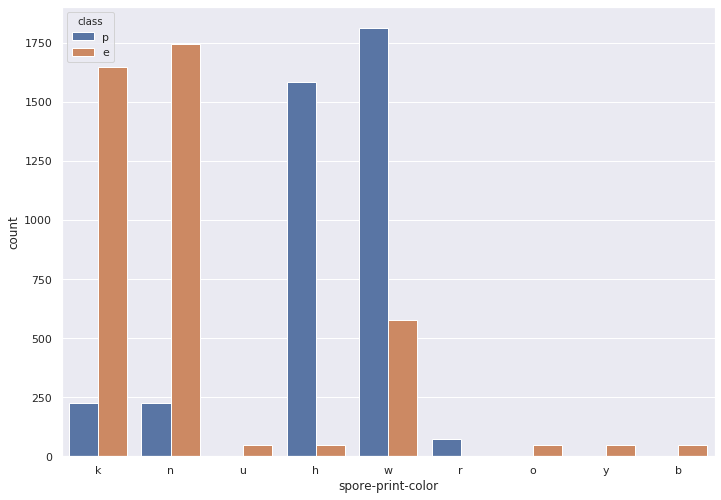

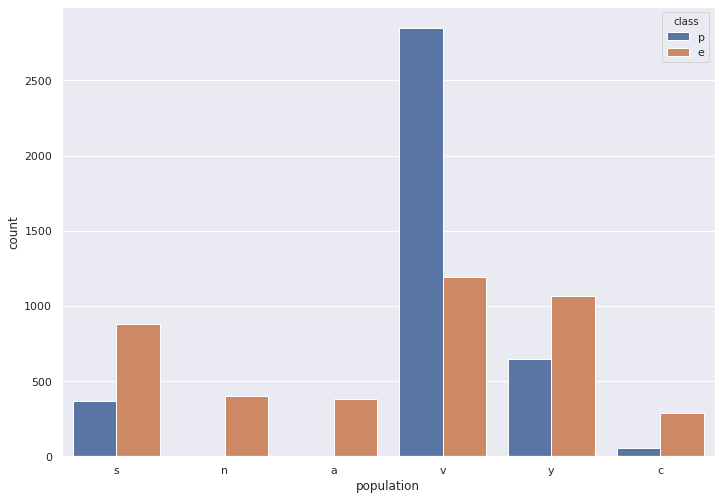

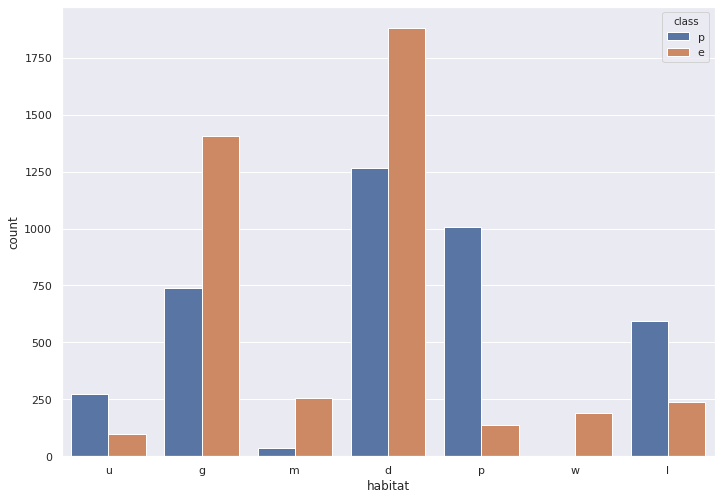

In [16]:
hue = raw_data["class"]
data_for_splot = raw_data.drop("class", 1)

sns_plot(hue, data_for_splot)

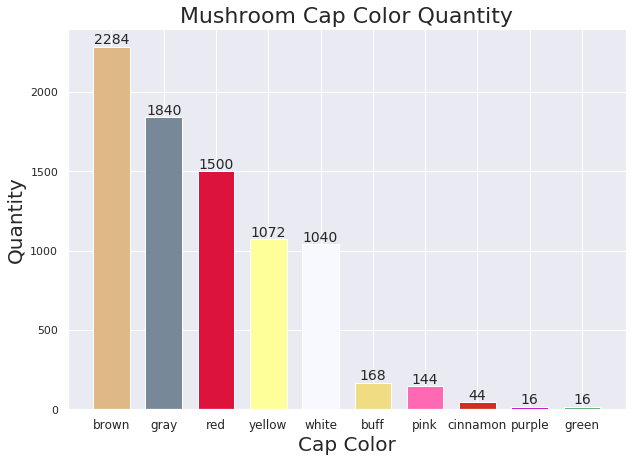

In [17]:
cap_colors = raw_data["cap-color"].value_counts()
m_height = cap_colors.values.tolist()
cap_colors.axes
cap_color_labels = cap_colors.axes[0].tolist()  #
# =====PLOT Preparations and Plotting====#
ind = np.arange(10)
width = 0.7
colors = [
    "#DEB887",
    "#778899",
    "#DC143C",
    "#FFFF99",
    "#f8f8ff",
    "#F0DC82",
    "#FF69B4",
    "#D22D1E",
    "#C000C5",
    "g",
]
fig, ax = plt.subplots(figsize=(10, 7))
mushroom_bars = ax.bar(ind, m_height, width, color=colors)
ax.set_xlabel("Cap Color", fontsize=20)
ax.set_ylabel("Quantity", fontsize=20)
ax.set_title("Mushroom Cap Color Quantity", fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(
    (
        "brown",
        "gray",
        "red",
        "yellow",
        "white",
        "buff",
        "pink",
        "cinnamon",
        "purple",
        "green",
    ),
    fontsize=12,
)


def autolabel(rects, fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.0,
            1 * height,
            "%d" % int(height),
            ha="center",
            va="bottom",
            fontsize=fontsize,
        )


autolabel(mushroom_bars)
plt.show()

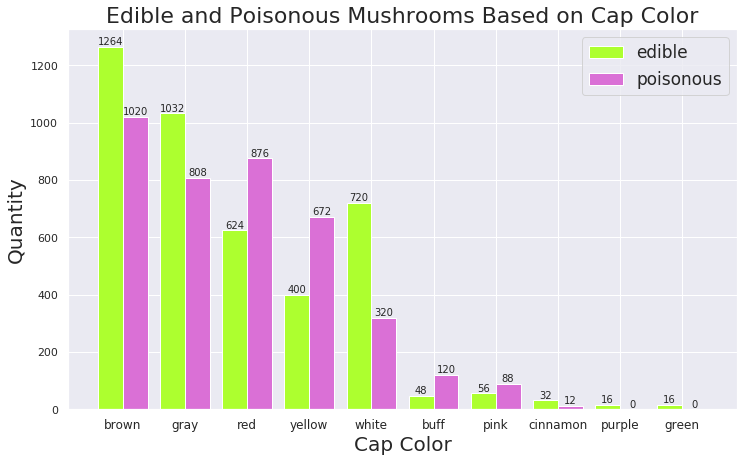

In [18]:
cap_colors = raw_data["cap-color"].value_counts()
cap_color_labels = cap_colors.axes[0].tolist()
poisonous_cc = []
edible_cc = []
for capColor in cap_color_labels:
    size = len(raw_data[raw_data["cap-color"] == capColor].index)
    edibles = len(
        raw_data[(raw_data["cap-color"] == capColor) & (raw_data["class"] == "e")].index
    )
    edible_cc.append(edibles)
    poisonous_cc.append(size - edibles)

# =====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12, 7))
edible_bars = ax.bar(ind, edible_cc, width, color="#ADFF2F")
poison_bars = ax.bar(ind + width, poisonous_cc, width, color="#DA70D6")

ax.set_xlabel("Cap Color", fontsize=20)
ax.set_ylabel("Quantity", fontsize=20)
ax.set_title("Edible and Poisonous Mushrooms Based on Cap Color", fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(
    (
        "brown",
        "gray",
        "red",
        "yellow",
        "white",
        "buff",
        "pink",
        "cinnamon",
        "purple",
        "green",
    ),
    fontsize=12,
)
ax.legend((edible_bars, poison_bars), ("edible", "poisonous"), fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
# print(edible_cc)
# print(poisonous_cc)

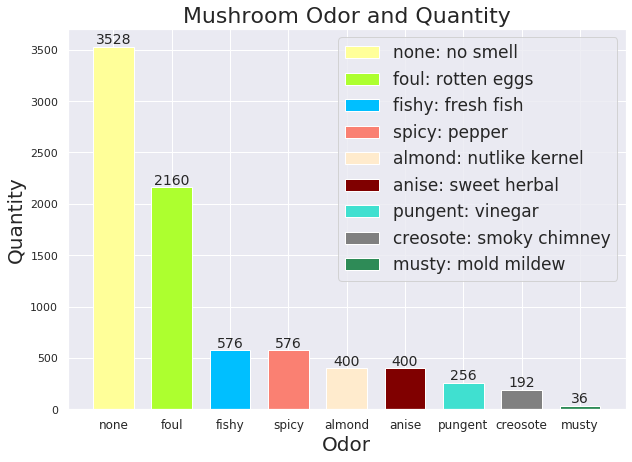

In [19]:
odors = raw_data["odor"].value_counts()
odor_height = odors.values.tolist()
odor_labels = odors.axes[0].tolist()
# =====PLOT Preparations and Plotting====#
width = 0.7
ind = np.arange(9)
colors = [
    "#FFFF99",
    "#ADFF2F",
    "#00BFFF",
    "#FA8072",
    "#FFEBCD",
    "#800000",
    "#40E0D0",
    "#808080",
    "#2E8B57",
]
fig, ax = plt.subplots(figsize=(10, 7))
odor_bars = ax.bar(ind, odor_height, width, color=colors)

ax.set_xlabel("Odor", fontsize=20)
ax.set_ylabel("Quantity", fontsize=20)
ax.set_title("Mushroom Odor and Quantity", fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(
    (
        "none",
        "foul",
        "fishy",
        "spicy",
        "almond",
        "anise",
        "pungent",
        "creosote",
        "musty",
    ),
    fontsize=12,
)
ax.legend(
    odor_bars,
    [
        "none: no smell",
        "foul: rotten eggs",
        "fishy: fresh fish",
        "spicy: pepper",
        "almond: nutlike kernel",
        "anise: sweet herbal",
        "pungent: vinegar",
        "creosote: smoky chimney",
        "musty: mold mildew",
    ],
    fontsize=17,
)
autolabel(odor_bars)
plt.show()

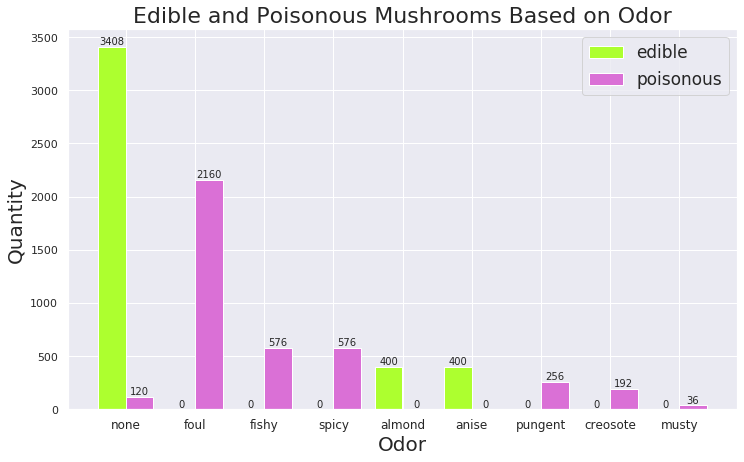

In [20]:
poisonous_od = []
edible_od = []
for odor in odor_labels:
    size = len(raw_data[raw_data["odor"] == odor].index)
    edibles = len(
        raw_data[(raw_data["odor"] == odor) & (raw_data["class"] == "e")].index
    )
    edible_od.append(edibles)
    poisonous_od.append(size - edibles)

# =====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12, 7))
edible_bars = ax.bar(ind, edible_od, width, color="#ADFF2F")
poison_bars = ax.bar(ind + width, poisonous_od, width, color="#DA70D6")

ax.set_xlabel("Odor", fontsize=20)
ax.set_ylabel("Quantity", fontsize=20)
ax.set_title("Edible and Poisonous Mushrooms Based on Odor", fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(
    (
        "none",
        "foul",
        "fishy",
        "spicy",
        "almond",
        "anise",
        "pungent",
        "creosote",
        "musty",
    ),
    fontsize=12,
)
ax.legend((edible_bars, poison_bars), ("edible", "poisonous"), fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
# print(edible_od)
# print(poisonous_od)

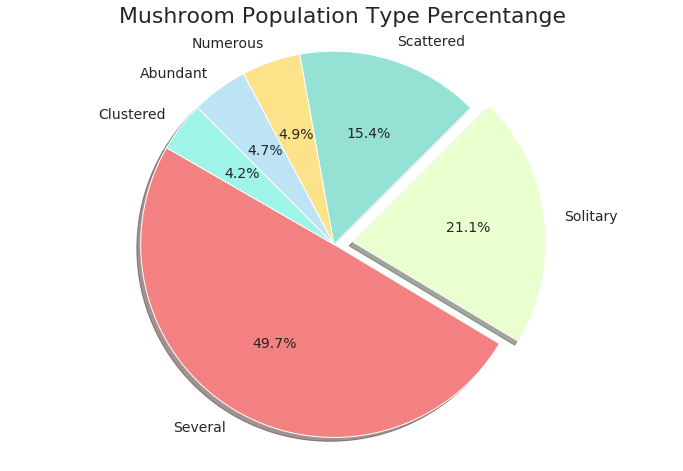

In [21]:
populations = raw_data["population"].value_counts()
pop_size = populations.values.tolist()
pop_types = populations.axes[0].tolist()
# print(pop_size)
pop_labels = "Several", "Solitary", "Scattered", "Numerous", "Abundant", "Clustered"
colors = ["#F38181", "#EAFFD0", "#95E1D3", "#FCE38A", "#BDE4F4", "#9EF4E6"]
explode = (0, 0.1, 0, 0, 0, 0)
fig = plt.figure(figsize=(12, 8))
plt.title("Mushroom Population Type Percentange", fontsize=22)
patches, texts, autotexts = plt.pie(
    pop_size,
    explode=explode,
    labels=pop_labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=150,
)
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis("equal")
plt.show()

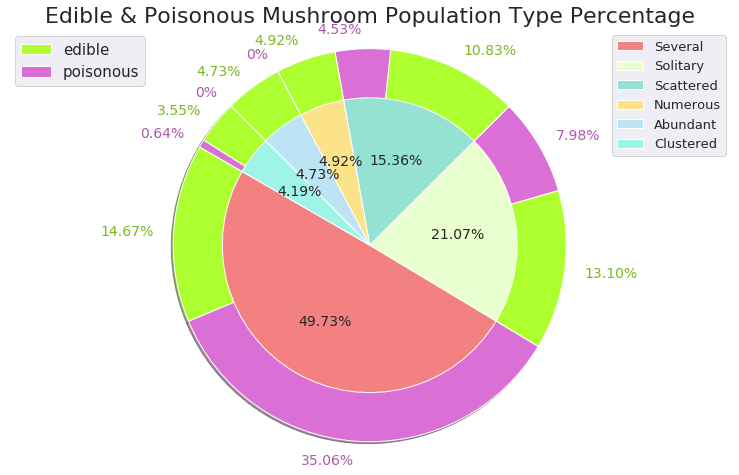

In [22]:
poisonous_pop = []
edible_pop = []
for pop in pop_types:
    size = len(raw_data[raw_data["population"] == pop].index)
    edibles = len(
        raw_data[(raw_data["population"] == pop) & (raw_data["class"] == "e")].index
    )
    edible_pop.append(edibles)
    poisonous_pop.append(size - edibles)
combine_ed_poi = []
for i in range(0, len(edible_pop)):
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])
fig = plt.subplots(figsize=(13, 8))
plt.title("Edible & Poisonous Mushroom Population Type Percentage", fontsize=22)
percentages_e_p = [
    "14.67%",
    "35.06%",
    "13.10%",
    "7.98%",
    "10.83%",
    "4.53%",
    "4.92%",
    "0%",
    "4.73%",
    "0%",
    "3.55%",
    "0.64%",
]
# ===First pie===
patches1, texts1 = plt.pie(
    combine_ed_poi,
    radius=2,
    labels=percentages_e_p,
    colors=["#ADFF2F", "#DA70D6"],
    shadow=True,
    startangle=150,
)
for i in range(0, len(texts1)):
    if i % 2 == 0:
        texts1[i].set_color("#7CB721")
    else:
        texts1[i].set_color("#AE59AB")
    texts1[i].set_fontsize(14)
# ===Second pie===
patches2, texts2, autotexts2 = plt.pie(
    pop_size,
    colors=colors,
    radius=1.5,
    autopct="%1.2f%%",
    shadow=True,
    startangle=150,
    labeldistance=2.2,
)
for aut in autotexts2:
    aut.set_fontsize(14)
    aut.set_horizontalalignment("center")
# ==Set 2 Legends to the plot.
first_legend = plt.legend(
    patches1, ["edible", "poisonous"], loc="upper left", fontsize=15
)
second_ledgend = plt.legend(patches2, pop_labels, loc="best", fontsize=13)
plt.gca().add_artist(first_legend)
plt.axis("equal")
plt.show()

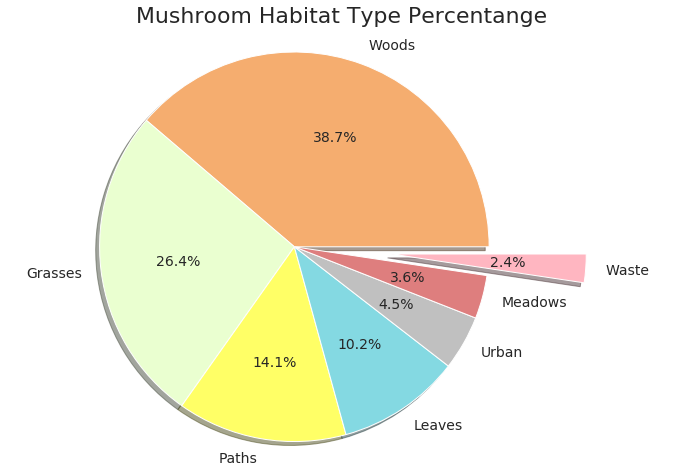

In [23]:
# Get the habitat types and its values for a Single Pie chart
habitats = raw_data["habitat"].value_counts()
hab_size = habitats.values.tolist()
hab_types = habitats.axes[0].tolist()
# print(habitats)
hab_labels = "Woods", "Grasses", "Paths", "Leaves", "Urban", "Meadows", "Waste"
colors = ["#F5AD6F", "#EAFFD0", "#FFFF66", "#84D9E2", "#C0C0C0", "#DE7E7E", "#FFB6C1"]
explode = (0, 0, 0, 0, 0, 0, 0.5)
fig = plt.figure(figsize=(12, 8))
plt.title("Mushroom Habitat Type Percentange", fontsize=22)
patches, texts, autotexts = plt.pie(
    hab_size,
    explode=explode,
    labels=hab_labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=360,
)
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis("equal")
plt.show()

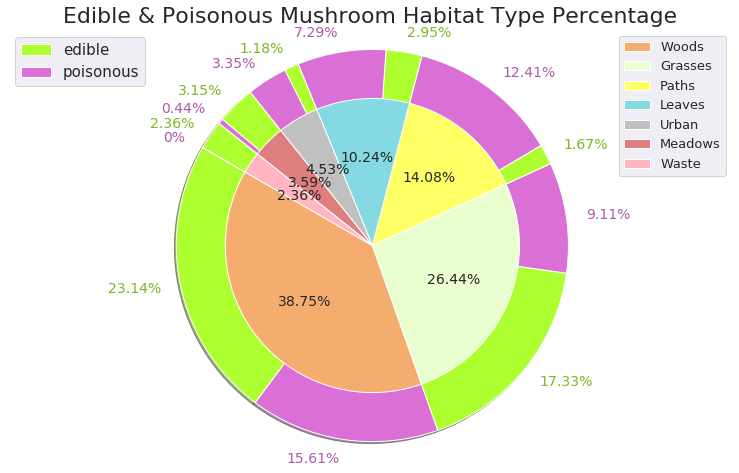

In [24]:
poisonous_hab = []
edible_hab = []
for hab in hab_types:
    size = len(raw_data[raw_data["habitat"] == hab].index)
    edibles = len(
        raw_data[(raw_data["habitat"] == hab) & (raw_data["class"] == "e")].index
    )
    edible_hab.append(edibles)
    poisonous_hab.append(size - edibles)
combine_ed_poi = []
for i in range(0, len(edible_hab)):
    combine_ed_poi.append(edible_hab[i])
    combine_ed_poi.append(poisonous_hab[i])
# print(edible_hab)
# print(poisonous_hab)
# print(combine_ed_poi)
fig = plt.subplots(figsize=(13, 8))
plt.title("Edible & Poisonous Mushroom Habitat Type Percentage", fontsize=22)
percentages_e_p = [
    "23.14%",
    "15.61%",
    "17.33%",
    "9.11%",
    "1.67%",
    "12.41%",
    "2.95%",
    "7.29%",
    "1.18%",
    "3.35%",
    "3.15%",
    "0.44%",
    "2.36%",
    "0%",
]
# ===First pie===
patches1, texts1 = plt.pie(
    combine_ed_poi,
    radius=2,
    labels=percentages_e_p,
    colors=["#ADFF2F", "#DA70D6"],
    shadow=True,
    startangle=150,
)
for i in range(0, len(texts1)):
    if i % 2 == 0:
        texts1[i].set_color("#7CB721")
    else:
        texts1[i].set_color("#AE59AB")
    texts1[i].set_fontsize(14)
# ===Second pie===
patches2, texts2, autotexts2 = plt.pie(
    hab_size,
    colors=colors,
    radius=1.5,
    autopct="%1.2f%%",
    shadow=True,
    startangle=150,
    labeldistance=2.2,
)
for aut in autotexts2:
    aut.set_fontsize(14)
    aut.set_horizontalalignment("center")
# ==Set 2 Legends to the plot.
first_legend = plt.legend(
    patches1, ["edible", "poisonous"], loc="upper left", fontsize=15
)
second_ledgend = plt.legend(patches2, hab_labels, loc="best", fontsize=13)
plt.gca().add_artist(first_legend)
plt.axis("equal")
plt.show()

In [25]:
for col in raw_data.columns:
    print("{} : {}".format(col, raw_data[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


# Feature transform

In [26]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
raw_data["class"] = label_encoder.fit_transform(raw_data["class"])
raw_data["class"].unique()

array([1, 0])

In [27]:
df_X = raw_data.drop(["class"], axis=1)
df_X = pd.get_dummies(df_X)
X = df_X.values

df_y = raw_data["class"].copy()
# df_y = pd.get_dummies(df_y)
y = df_y.values

In [28]:
seed = 11
np.random.seed(seed)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=seed)

# Select The Best Model

In [29]:
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
models.append(("RF", RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
# trainX, testX, trainy, testy

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainX, trainy, cv=kfold, scoring="precision")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
LDA: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.928255 (0.015644)
SVM: 1.000000 (0.000000)
RF: 1.000000 (0.000000)


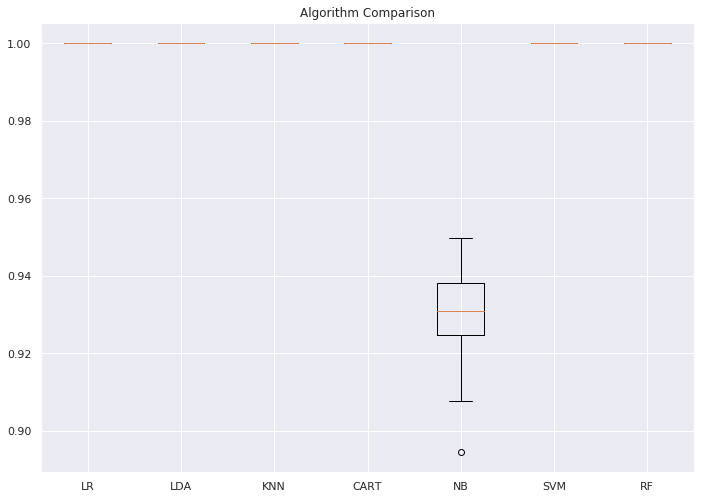

In [31]:
pyplot.boxplot(results, labels=names)
pyplot.title("Algorithm Comparison")
pyplot.show()

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=5)
clf.fit(trainX, trainy)
predictions = clf.predict(trainX)
confusion_matrix(trainy, predictions)

array([[2934,    0],
       [   0, 2752]])

In [33]:
feature_importances_list = []
for col in df_X.columns:
    feature_importances_list.append(col)
df_feature_importances = pd.DataFrame(
    list(zip(feature_importances_list, clf.feature_importances_)),
    columns=["Feature", "importance"],
)
df_feature_importances = df_feature_importances.sort_values(
    by=["importance"], ascending=False
)
df_feature_importances.head(5)

,Feature,importance
27,odor_n,0.107740
36,gill-size_n,0.081238
24,odor_f,0.068431
96,spore-print-color_h,0.062514
57,stalk-surface-above-ring_k,0.053968


In [34]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
models.append(("RF", RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
# trainX, testX, trainy, testy

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainX, trainy, cv=kfold, scoring="f1")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.999817 (0.000548)
LDA: 0.999638 (0.000723)
KNN: 1.000000 (0.000000)
CART: 0.999638 (0.000723)
NB: 0.962553 (0.008380)
SVM: 1.000000 (0.000000)
RF: 1.000000 (0.000000)


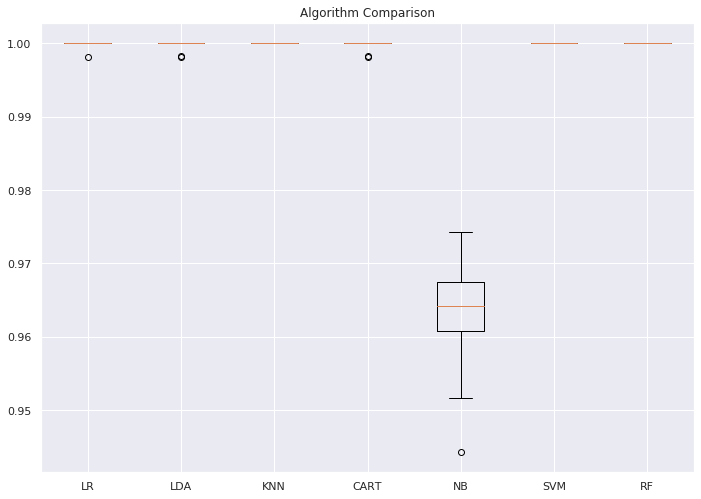

In [35]:
pyplot.boxplot(results, labels=names)
pyplot.title("Algorithm Comparison")
pyplot.show()

The most accurate model and model with the perfect score is KNN.

In [36]:
knn = KNeighborsClassifier()
knn.fit(trainX, trainy)
filename = "final_model.sav"
pickle.dump(knn, open(filename, "wb"))

predictions = knn.predict(testX)
# trainX, testX, trainy, testy

In [37]:
print(accuracy_score(testy, predictions))
print(confusion_matrix(testy, predictions))
print(classification_report(testy, predictions))

1.0
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

